<a href="https://colab.research.google.com/github/krimplessy/Machine_Learning/blob/main/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Наивный байесовский классификатор

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from scipy.signal import medfilt

In [ ]:
# Файловый способ подключения выборки данных
#data = pd.read_csv('diabetes.csv', names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

file_path = "diabetes.csv"
data = pd.read_csv(file_path)

X = data.drop("Outcome", 1)
Y = data.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20)

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)

print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.7821229050279329
Test :  0.7229437229437229
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       153
           1       0.60      0.55      0.57        78

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



In [ ]:
train_accuracy = []
test_accuracy = []

for state in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=state)

    model = GaussianNB()
    model.fit(X_train, Y_train)
    print(f'''
    random_state: {state}
    Results:
      Train={model.score(X_train, Y_train)}
      Test={model.score(X_test, Y_test)}
  ''')
    #models.append(model)
    test_accuracy.append(model.score(X_test, Y_test))
    train_accuracy.append(model.score(X_train, Y_train))


    random_state: 0
    Results:
      Train=0.7672253258845437
      Test=0.7619047619047619
  

    random_state: 1
    Results:
      Train=0.7616387337057728
      Test=0.7835497835497836
  

    random_state: 2
    Results:
      Train=0.7616387337057728
      Test=0.7705627705627706
  

    random_state: 3
    Results:
      Train=0.7746741154562383
      Test=0.7272727272727273
  

    random_state: 4
    Results:
      Train=0.7523277467411545
      Test=0.7878787878787878
  

    random_state: 5
    Results:
      Train=0.7392923649906891
      Test=0.7575757575757576
  

    random_state: 6
    Results:
      Train=0.7541899441340782
      Test=0.7792207792207793
  

    random_state: 7
    Results:
      Train=0.770949720670391
      Test=0.7402597402597403
  

    random_state: 8
    Results:
      Train=0.7597765363128491
      Test=0.7835497835497836
  

    random_state: 9
    Results:
      Train=0.7746741154562383
      Test=0.7575757575757576
  

    random_state: 10

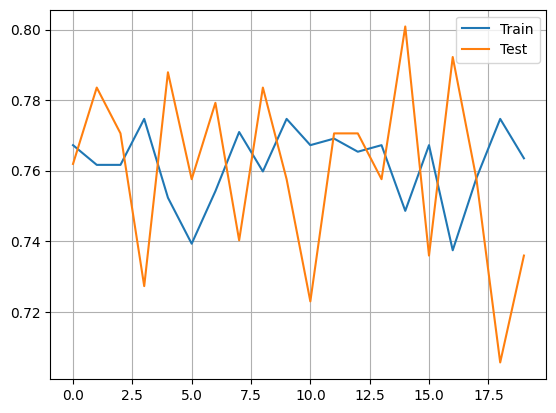

In [ ]:
plt.plot(range(20), train_accuracy, label='Train')
plt.plot(range(20), test_accuracy, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()